In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("/content/train.csv",usecols=["FireplaceQu","GarageQual","SalePrice"])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [12]:
df.isnull().mean()*100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


<Axes: xlabel='GarageQual'>

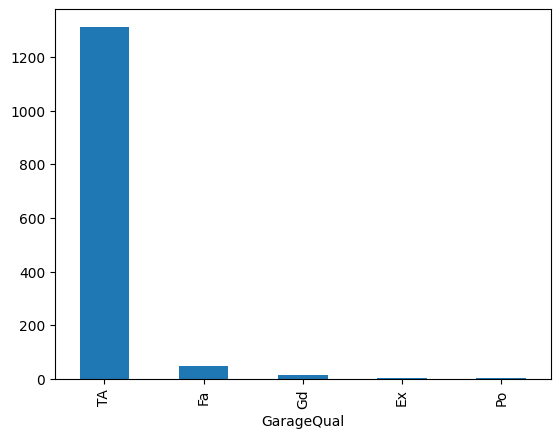

In [14]:
df["GarageQual"].value_counts().plot(kind="bar")

In [15]:
df["GarageQual"].mode()

,GarageQual
0,TA


In [16]:
df["GarageQual"].isnull().sum()

81

Text(0.5, 1.0, 'GarageQual')

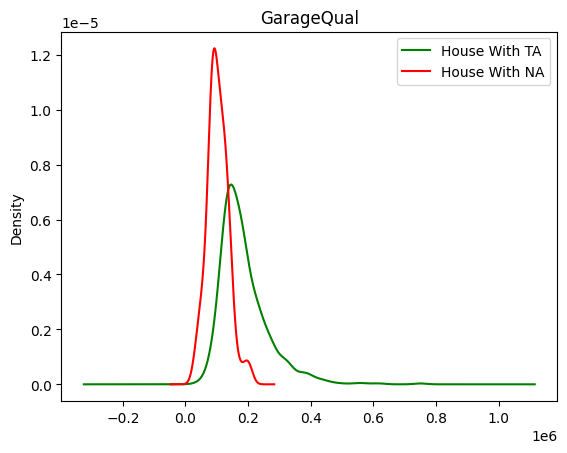

In [20]:
fig = plt.figure()
ax= fig.add_subplot(111)

df[df["GarageQual"]=="TA"]["SalePrice"].plot(kind="kde",ax=ax,color="green")
df[df["GarageQual"].isnull()]["SalePrice"].plot(kind="kde",color="red")

lines,labels= ax.get_legend_handles_labels()
labels = ["House With TA","House With NA"]

ax.legend(lines,labels,loc="best")

plt.title("GarageQual")

In [24]:
temp = df[df["GarageQual"]=="TA"]["SalePrice"]

In [25]:
df["GarageQual"].fillna("TA",inplace=True)

<Axes: xlabel='GarageQual'>

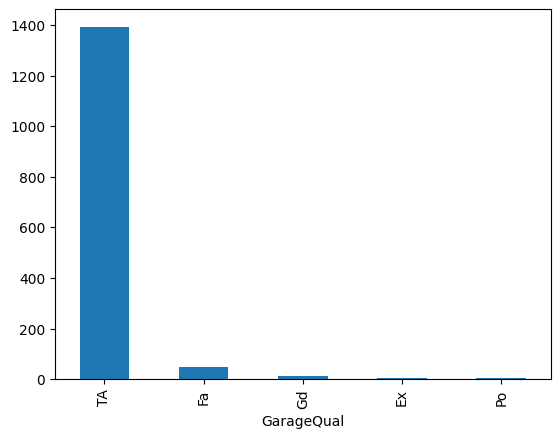

In [29]:
df["GarageQual"].value_counts().plot(kind="bar")

Text(0.5, 1.0, 'GarageQual')

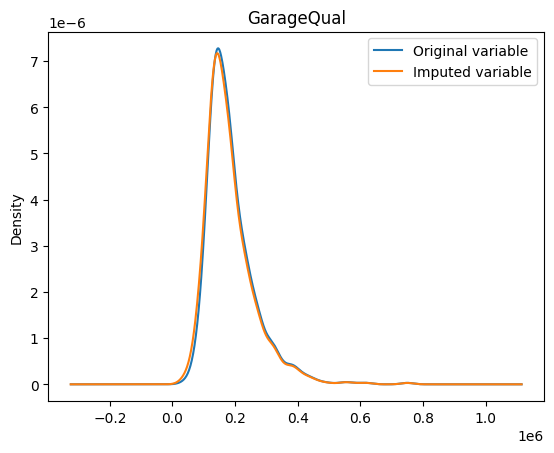

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind="kde",ax=ax)


# distribution of the variable after imputation
df[df["GarageQual"]=="TA"]["SalePrice"].plot(kind="kde",ax=ax)


lines, labels = ax.get_legend_handles_labels()
labels = ["Original variable","Imputed variable"]
ax.legend(lines,labels,loc="best")


plt.title("GarageQual")

In [38]:
df["FireplaceQu"].isnull().sum()

690

<Axes: xlabel='FireplaceQu'>

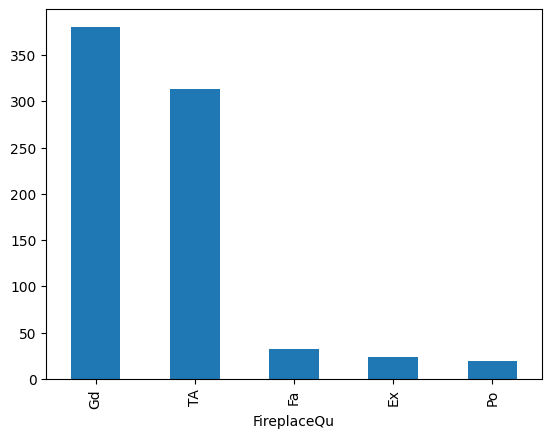

In [40]:
df["FireplaceQu"].value_counts().plot(kind="bar")

In [41]:
df["FireplaceQu"].mode()

,FireplaceQu
0,Gd


Text(0.5, 1.0, 'FireplaceQu')

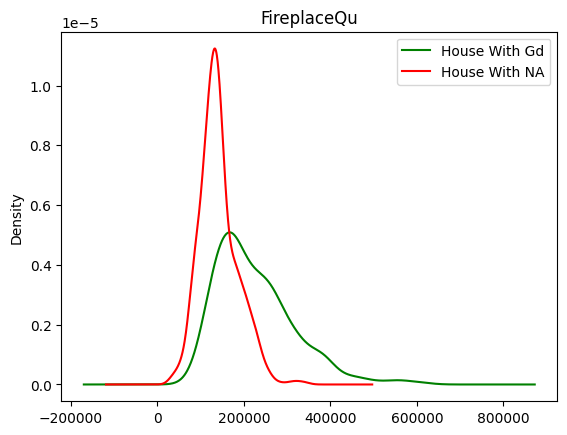

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df["FireplaceQu"]=="Gd"]["SalePrice"].plot(kind="kde",ax=ax,color="green")
df[df["FireplaceQu"].isnull()]["SalePrice"].plot(kind="kde",color="red")

lines,labels = ax.get_legend_handles_labels()
labels = ["House With Gd","House With NA"]

ax.legend(lines,labels,loc="best")

plt.title("FireplaceQu")

In [49]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

In [52]:
df['FireplaceQu'].fillna('Gd', inplace=True)

<Axes: xlabel='FireplaceQu'>

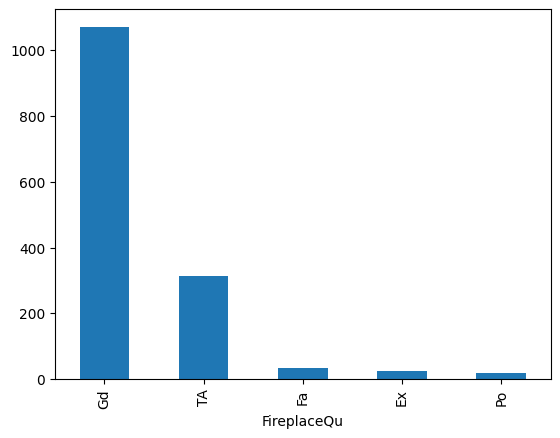

In [53]:
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

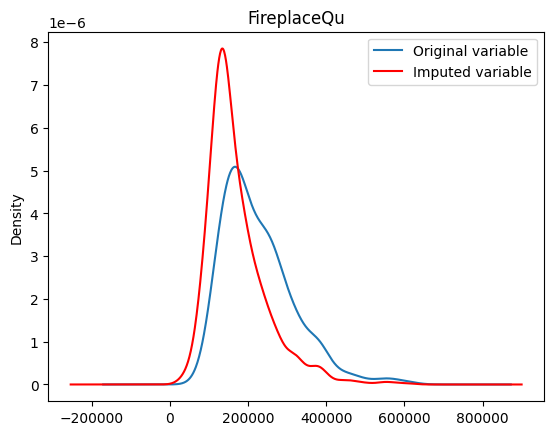

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('FireplaceQu')

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [56]:
from sklearn.impute import SimpleImputer

In [57]:
imputer = SimpleImputer(strategy='most_frequent')

In [58]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [59]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)